In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [12]:
class XOR_Data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i,:] = torch.Tensor([0.0, 0.0])
            self.y[i,0] = torch.Tensor([0.0])

            self.x[i+N_s//4,:] = torch.Tensor([1.0, 0.0])
            self.y[i+N_s//4,0] = torch.Tensor([1.0])

            self.x[i+N_s//2,:] = torch.Tensor([1.0, 0.0])
            self.y[i+N_s//2,0] = torch.Tensor([1.0])

            self.x[i+3+N_s//4,:] = torch.Tensor([1.0, 1.0])
            self.y[i+3+N_s//4,0] = torch.Tensor([1.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))

        self.len = N_s

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [6]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [14]:
def train_model(dataset, model, criterion, trainloader, optimizer, epochs=5):
    COST = []
    for epoch in range(epochs):
        total = 0
        for x, y in trainloader:
            yhat = model(x)
            optimizer.zero_grad()
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.item()
        COST.append(total)
    return COST

In [15]:
criterion = nn.BCELoss()

dataset = XOR_Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

model = Net(2, 4, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

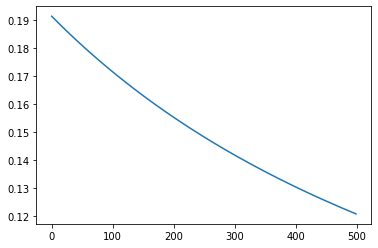

In [18]:
COST = train_model(dataset, model, criterion, trainloader, optimizer, epochs=500)
plt.plot(COST)
plt.show()